# SMOTE(Synthetic Minority Oversampling Technique)

SMOTE is a technique used in machine learning that is used to address the imbalance dataset 
where the minority class has very few instances than the majority class. 
It is used to generate synthetic instances of the minority class by interpolating the two existing minority class

In [1]:
from sklearn.datasets import make_classification

In [4]:
x,y = make_classification(n_samples = 1000,n_redundant = 0, n_features = 2, n_clusters_per_class = 1, weights = [0.90], random_state = 42)

In [5]:
x,y

(array([[ 1.0735459 , -1.10133925],
        [ 0.75594526, -1.1723519 ],
        [ 1.35447877, -0.94852841],
        ...,
        [-2.15090138, -2.98937226],
        [ 2.45164689, -0.1566294 ],
        [ 3.64147835,  0.75692519]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 

In [7]:
# Create the Dataframe
import pandas as pd
x1 = pd.DataFrame(x, columns = ['f1','f2'])
y1 = pd.DataFrame(y, columns = ['target'])
final_df = pd.concat([x1, y1], axis = 1)
final_df.head()

,f1,f2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0


In [8]:
final_df

,f1,f2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0
...,...,...,...
995,1.713939,0.451639,1
996,1.509473,-0.794996,0
997,-2.150901,-2.989372,0
998,2.451647,-0.156629,0


In [9]:
# target counts
final_df['target'].value_counts()

0    896
1    104
Name: target, dtype: int64

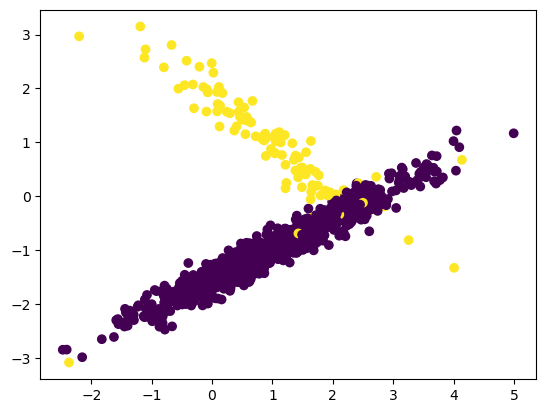

In [10]:
# To plot the original dataset
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c = final_df['target'])

In [12]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 9.2 MB/s eta 0:00:00


In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
oversampling = SMOTE()
X,Y = oversampling.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [16]:
X.shape

(1792, 2)

In [18]:
Y.shape

(1792,)

In [22]:
len(X[X == 0])

1792

In [27]:
len(Y[Y == 1])

896

In [28]:
len(Y[Y == 0])

896

In [29]:
len(X[X == 1])

1792

In [31]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(Y, columns = ['target'])
oversample_df = pd.concat([df1, df2], axis = 1)

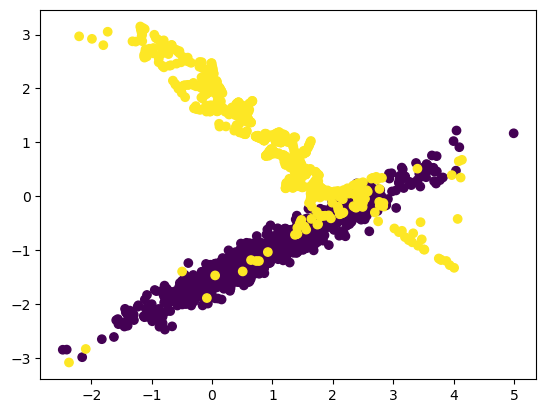

In [33]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c = oversample_df['target'])